# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +29.76343094328                   -1.40    6.46s
  2   +24.14882536903        0.75       -0.65   11.2ms
  3   +21.50927518252        0.42       -0.29   11.1ms
  4   +21.43788024576       -1.15       -0.40   11.2ms
  5   +19.73762634261        0.23       -0.56   11.0ms
  6   +14.90530202945        0.68       -0.46   11.0ms
  7   +10.78667271369        0.61       -0.37   11.0ms
  8   +10.00246890861       -0.11       -0.65   8.91ms
  9   +9.571473479074       -0.37       -0.81   8.97ms
 10   +9.258055528674       -0.50       -0.95   9.07ms
 11   +9.004411882971       -0.60       -0.99   9.09ms
 12   +8.836330136845       -0.77       -1.05   9.62ms
 13   +8.686096641093       -0.82       -1.06   9.16ms
 14   +8.555654361958       -0.88       -1.03   9.03ms
 15   +8.451485919278       -0.98       -1.01   9.19ms
 16   +8.414483598562       -1.43       -0.93   6.98ms
 17   +8.33

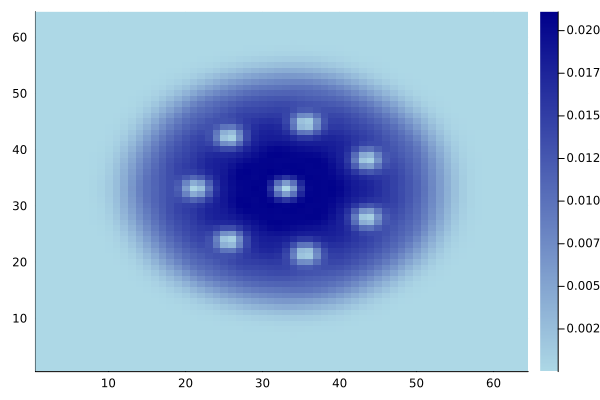

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)